In [1]:
import numpy as np# The normal imports
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline
import pandas as pd


In [2]:
flight = sns.load_dataset("flights")

In [3]:
flight.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight.pivot("month", "year", "passengers")

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


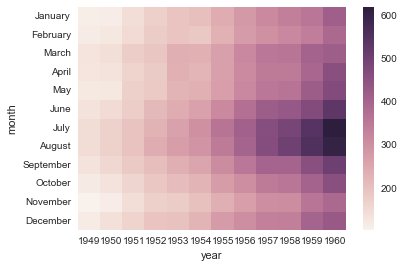

In [6]:
sns.heatmap(flight_dframe)

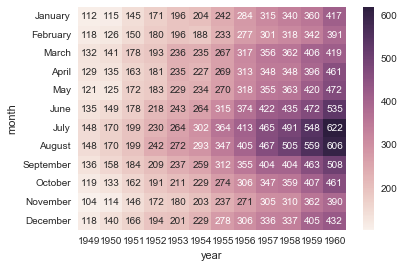

In [12]:
sns.heatmap(flight_dframe, annot=True, fmt='d')

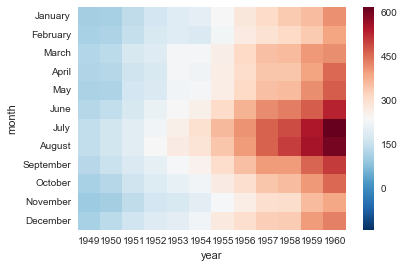

In [18]:
sns.heatmap(flight_dframe, center= flight_dframe.loc['January', 1955])

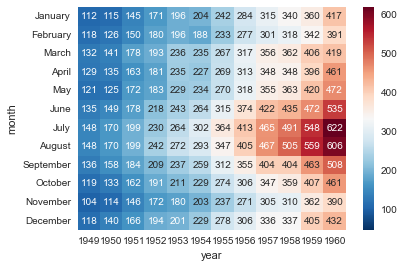

In [20]:
sns.heatmap(flight_dframe, annot=True, fmt='d', center=flight_dframe.loc['December', 1957])

In [28]:
yearly_flights = flight_dframe.sum()

In [40]:
year = pd.DataFrame(yearly_flights.index)
pas = pd.DataFrame(yearly_flights.values)

year_dframe = pd.concat((year,pas), axis=1)
year_dframe.columns = ['Year','Passengers']
year_dframe

,Year,Passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


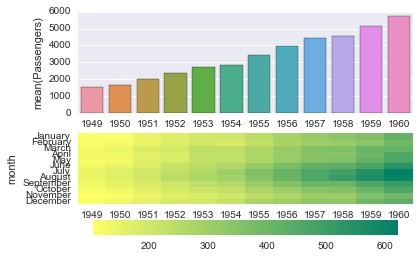

In [52]:
f, (axis1,axis2) = plt.subplots(2,1)
sns.barplot(x = 'Year', y = 'Passengers',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,ax=axis2,cbar_kws={"orientation":"horizontal"},cmap="summer_r")

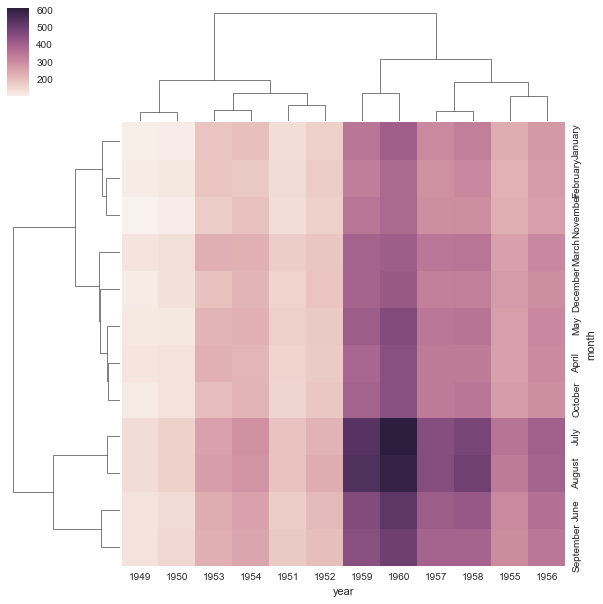

In [60]:
sns.clustermap(flight_dframe)

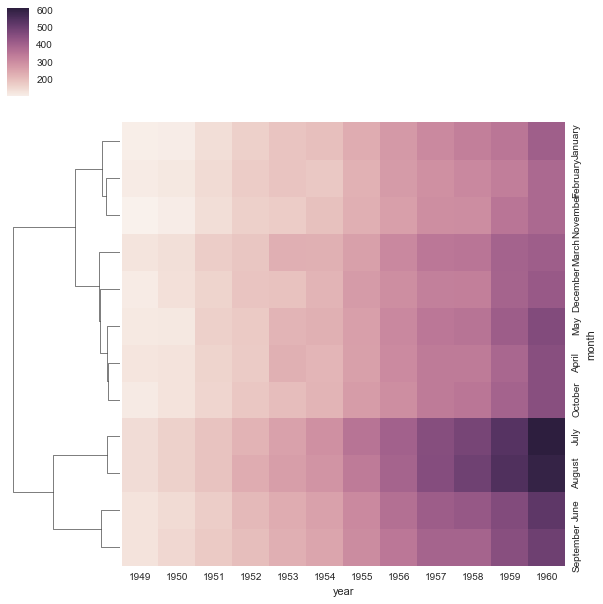

In [61]:
sns.clustermap(flight_dframe, col_cluster=False)

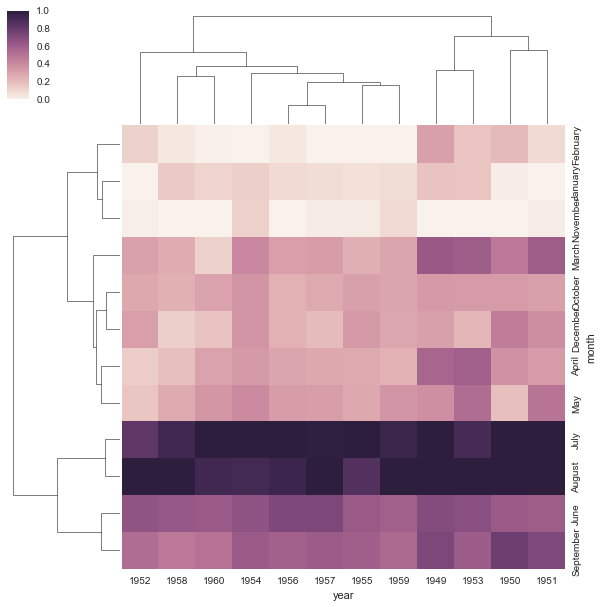

In [62]:
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1)

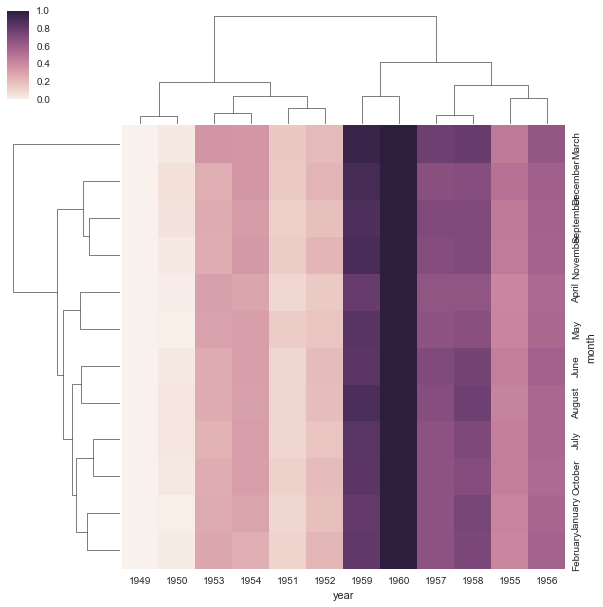

In [63]:
sns.clustermap(flight_dframe, standard_scale=0)

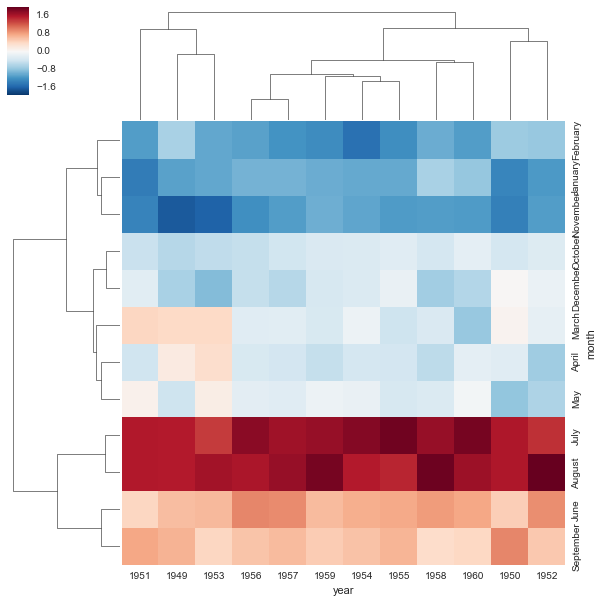

In [64]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)